# Precificando Jogadores de Futebol

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Coleta de dados
Nesta seção iremos coletar os dados por meio de web scraping e apis de outros sites

### Obtendo dados das transferências para um range de temporadas da Premier League (demora 3 a 6 segundos por temporada, depende da internet)

In [39]:
transfers = pd.read_csv('data/transfers/all_transfers.csv')
recent_transfers = transfers[transfers['season']>=2017]

# Análise exploratória dos dados
Nesta seção iremos apresentar análises e visualizações dos dados para entender melhor as relações entre variáveis, padrões relevantes e bons insights

In [40]:
recent_transfers

,playerName,playerLink,playerAge,playerPos,playerCountry,playerMarketValue,transferFee,clubLeft,clubLeftUrl,clubJoined,clubJoinedUrl,teamTransferType,season,valuation
1991,Ethan Ampadu,/ethan-ampadu/profil/spieler/392771,16,CB,Wales,9000000,2800000,Exeter City,/exeter-city/startseite/verein/6699,Chelsea FC,/fc-chelsea/startseite/verein/631,in,2017,6200000
1992,Davinson Sánchez,/davinson-sanchez/profil/spieler/341429,21,CB,Colombia,15000000,42000000,Ajax Amsterdam,/ajax-amsterdam/startseite/verein/610,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,in,2017,-27000000
1993,Juan Foyth,/juan-foyth/profil/spieler/480763,19,RB,Argentina,25000000,10500000,Club Estudiantes de La Plata,/club-estudiantes-de-la-plata/startseite/verei...,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,in,2017,14500000
1994,Kyle Walker,/kyle-walker/profil/spieler/95424,27,RB,England,13000000,52700000,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,Manchester City,/manchester-city/startseite/verein/281,in,2017,-39700000
1995,Ederson,/ederson/profil/spieler/238223,23,GK,Brazil,40000000,40000000,SL Benfica,/benfica-lissabon/startseite/verein/294,Manchester City,/manchester-city/startseite/verein/281,in,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12978,Ibrahim Cissoko,/ibrahim-cissoko/profil/spieler/575693,20,LW,Netherlands,2500000,3000000,NEC Nijmegen,/nec-nijmegen/startseite/verein/467,FC Toulouse,/fc-toulouse/startseite/verein/415,in,2023,-500000
12979,Mahdi Camara,/mahdi-camara/profil/spieler/324795,25,CM,France,3000000,3000000,AS Saint-Étienne,/as-saint-etienne/startseite/verein/618,Stade Brestois 29,/stade-brest-29/startseite/verein/3911,in,2023,0
12980,Mostafa Mohamed,/mostafa-mohamed/profil/spieler/462348,25,CF,Egypt,6000000,5750000,Galatasaray,/galatasaray-istanbul/startseite/verein/141,FC Nantes,/fc-nantes/startseite/verein/995,in,2023,250000
12981,Andy Delort,/andy-delort/profil/spieler/122797,31,CF,Algeria,7000000,5000000,OGC Nice,/ogc-nizza/startseite/verein/417,FC Nantes,/fc-nantes/startseite/verein/995,in,2023,2000000


In [41]:
recent_transfers.describe()

,playerAge,playerMarketValue,transferFee,season,valuation
count,3991.000000,3.991000e+03,3.991000e+03,3991.000000,3.991000e+03
mean,24.213480,8.027930e+06,8.546363e+06,2019.490103,-5.184322e+05
std,3.702404,1.429209e+07,1.355289e+07,1.845903,1.235183e+07
min,16.000000,0.000000e+00,1.000000e+03,2017.000000,-1.620000e+08
25%,21.000000,8.000000e+05,1.500000e+06,2018.000000,-3.000000e+06
50%,24.000000,2.700000e+06,3.900000e+06,2019.000000,-4.500000e+05
75%,27.000000,9.000000e+06,1.000000e+07,2021.000000,1.500000e+06
max,37.000000,1.800000e+08,2.220000e+08,2023.000000,1.600000e+08


In [42]:
recent_transfers_out = recent_transfers[recent_transfers['teamTransferType'] == 'out']

recent_transfers_out

,playerName,playerLink,playerAge,playerPos,playerCountry,playerMarketValue,transferFee,clubLeft,clubLeftUrl,clubJoined,clubJoinedUrl,teamTransferType,season,valuation
2000,Fernando,/fernando/profil/spieler/51174,30,DM,Brazil,3000000,6000000,Manchester City,/manchester-city/startseite/verein/281,Galatasaray,/galatasaray-istanbul/startseite/verein/141,out,2017,-3000000
2001,Samir Nasri,/samir-nasri/profil/spieler/18935,30,AM,France,0,3500000,Manchester City,/manchester-city/startseite/verein/281,Antalyaspor,/antalyaspor/startseite/verein/589,out,2017,-3500000
2003,Kevin Stewart,/kevin-stewart/profil/spieler/200782,23,DM,Jamaica,300000,4500000,Liverpool FC,/fc-liverpool/startseite/verein/31,Hull City,/hull-city/startseite/verein/3008,out,2017,-4200000
2004,Andre Wisdom,/andre-wisdom/profil/spieler/128912,24,RB,England,0,2300000,Liverpool FC,/fc-liverpool/startseite/verein/31,Derby County,/derby-county/startseite/verein/22,out,2017,-2300000
2006,Alex Oxlade-Chamberlain,/alex-oxlade-chamberlain/profil/spieler/143424,24,CM,England,7000000,38000000,Arsenal FC,/fc-arsenal/startseite/verein/11,Liverpool FC,/fc-liverpool/startseite/verein/31,out,2017,-31000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12970,Cenk Özkacar,/cenk-ozkacar/profil/spieler/615350,22,CB,Turkey,5000000,5000000,Olympique Lyon,/olympique-lyon/startseite/verein/1041,Valencia CF,/fc-valencia/startseite/verein/1049,out,2023,0
12972,Terem Moffi,/terem-moffi/profil/spieler/538874,24,CF,Nigeria,20000000,22500000,FC Lorient,/fc-lorient/startseite/verein/1158,OGC Nice,/ogc-nizza/startseite/verein/417,out,2023,-2500000
12973,Moritz Jenz,/moritz-jenz/profil/spieler/460245,24,CB,Germany,7500000,8000000,FC Lorient,/fc-lorient/startseite/verein/1158,VfL Wolfsburg,/vfl-wolfsburg/startseite/verein/82,out,2023,-500000
12976,Hugo Ekitiké,/hugo-ekitike/profil/spieler/709726,21,CF,France,20000000,28500000,Stade Reims,/stade-reims/startseite/verein/1421,Paris Saint-Germain,/fc-paris-saint-germain/startseite/verein/583,out,2023,-8500000


In [43]:
recent_transfers_in = recent_transfers[recent_transfers['teamTransferType'] == 'in']

recent_transfers_in

,playerName,playerLink,playerAge,playerPos,playerCountry,playerMarketValue,transferFee,clubLeft,clubLeftUrl,clubJoined,clubJoinedUrl,teamTransferType,season,valuation
1991,Ethan Ampadu,/ethan-ampadu/profil/spieler/392771,16,CB,Wales,9000000,2800000,Exeter City,/exeter-city/startseite/verein/6699,Chelsea FC,/fc-chelsea/startseite/verein/631,in,2017,6200000
1992,Davinson Sánchez,/davinson-sanchez/profil/spieler/341429,21,CB,Colombia,15000000,42000000,Ajax Amsterdam,/ajax-amsterdam/startseite/verein/610,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,in,2017,-27000000
1993,Juan Foyth,/juan-foyth/profil/spieler/480763,19,RB,Argentina,25000000,10500000,Club Estudiantes de La Plata,/club-estudiantes-de-la-plata/startseite/verei...,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,in,2017,14500000
1994,Kyle Walker,/kyle-walker/profil/spieler/95424,27,RB,England,13000000,52700000,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,Manchester City,/manchester-city/startseite/verein/281,in,2017,-39700000
1995,Ederson,/ederson/profil/spieler/238223,23,GK,Brazil,40000000,40000000,SL Benfica,/benfica-lissabon/startseite/verein/294,Manchester City,/manchester-city/startseite/verein/281,in,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12977,Falaye Sacko,/falaye-sacko/profil/spieler/364857,28,RB,Mali,4000000,1300000,Vitória Guimarães SC,/vitoria-guimaraes-sc/startseite/verein/2420,Montpellier HSC,/montpellier-hsc/startseite/verein/969,in,2023,2700000
12978,Ibrahim Cissoko,/ibrahim-cissoko/profil/spieler/575693,20,LW,Netherlands,2500000,3000000,NEC Nijmegen,/nec-nijmegen/startseite/verein/467,FC Toulouse,/fc-toulouse/startseite/verein/415,in,2023,-500000
12979,Mahdi Camara,/mahdi-camara/profil/spieler/324795,25,CM,France,3000000,3000000,AS Saint-Étienne,/as-saint-etienne/startseite/verein/618,Stade Brestois 29,/stade-brest-29/startseite/verein/3911,in,2023,0
12980,Mostafa Mohamed,/mostafa-mohamed/profil/spieler/462348,25,CF,Egypt,6000000,5750000,Galatasaray,/galatasaray-istanbul/startseite/verein/141,FC Nantes,/fc-nantes/startseite/verein/995,in,2023,250000


In [44]:
all_players = pd.read_csv('data/players/all_players.csv')
all_players

,playerLink,currAge,height,foot,currClub,playerName,playerPos,playerCountry,playerMarketValue
0,/mark-viduka/profil/spieler/3242,47.0,1.88,both,Retired,Mark Viduka,CF,Australia,0
1,/jacob-burns/profil/spieler/4096,45.0,1.78,left,Retired,Jacob Burns,DM,Australia,0
2,/lee-matthews/profil/spieler/20977,44.0,1.88,right,Unknown,Lee Matthews,CM,England,0
3,/david-hopkin/profil/spieler/107198,52.0,1.83,right,Retired,David Hopkin,RM,Scotland,0
4,/ashley-ward/profil/spieler/13548,52.0,1.85,right,Retired,Ashley Ward,CF,England,0
...,...,...,...,...,...,...,...,...,...
8082,/hugo-ekitike/profil/spieler/709726,21.0,1.89,right,Paris Saint-Germain,Hugo Ekitiké,CF,France,20000000
8083,/falaye-sacko/profil/spieler/364857,28.0,1.79,right,Montpellier HSC,Falaye Sacko,RB,Mali,4000000
8084,/ibrahim-cissoko/profil/spieler/575693,20.0,NaN,right,FC Toulouse,Ibrahim Cissoko,LW,Netherlands,2500000
8085,/mahdi-camara/profil/spieler/324795,25.0,1.78,right,Stade Brestois 29,Mahdi Camara,CM,France,3000000


In [45]:
recent_transfers_players = pd.merge(recent_transfers, all_players[['playerLink', 'currAge', 'height', 'foot']], on="playerLink", how="left")
recent_transfers_players = recent_transfers_players[recent_transfers_players['season'] >= 2018]
recent_transfers_players

,playerName,playerLink,playerAge,playerPos,playerCountry,playerMarketValue,transferFee,clubLeft,clubLeftUrl,clubJoined,clubJoinedUrl,teamTransferType,season,valuation,currAge,height,foot
122,Ante Palaversa,/ante-palaversa/profil/spieler/371003,18,CM,Croatia,700000,6300000,HNK Hajduk Split,/hnk-hajduk-split/startseite/verein/447,Manchester City,/manchester-city/startseite/verein/281,in,2018,-5600000,23.0,1.87,right
123,Philippe Sandler,/philippe-sandler/profil/spieler/340460,21,CB,Netherlands,1800000,2500000,PEC Zwolle,/pec-zwolle/startseite/verein/1269,Manchester City,/manchester-city/startseite/verein/281,in,2018,-700000,26.0,1.90,right
124,Ko Itakura,/ko-itakura/profil/spieler/355816,21,CB,Japan,12000000,1100000,Kawasaki Frontale,/kawasaki-frontale/startseite/verein/9598,Manchester City,/manchester-city/startseite/verein/281,in,2018,10900000,26.0,1.88,right
125,Daniel Arzani,/daniel-arzani/profil/spieler/399997,19,LW,Australia,450000,890000,Melbourne City FC,/melbourne-city-fc/startseite/verein/25580,Manchester City,/manchester-city/startseite/verein/281,in,2018,-440000,24.0,1.75,right
126,Olarenwaju Kayode,/olarenwaju-kayode/profil/spieler/131694,25,CF,Nigeria,1300000,3000000,Manchester City,/manchester-city/startseite/verein/281,Shakhtar Donetsk,/shakhtar-donetsk/startseite/verein/660,out,2018,-1700000,30.0,1.76,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,Ibrahim Cissoko,/ibrahim-cissoko/profil/spieler/575693,20,LW,Netherlands,2500000,3000000,NEC Nijmegen,/nec-nijmegen/startseite/verein/467,FC Toulouse,/fc-toulouse/startseite/verein/415,in,2023,-500000,20.0,NaN,right
3987,Mahdi Camara,/mahdi-camara/profil/spieler/324795,25,CM,France,3000000,3000000,AS Saint-Étienne,/as-saint-etienne/startseite/verein/618,Stade Brestois 29,/stade-brest-29/startseite/verein/3911,in,2023,0,25.0,1.78,right
3988,Mostafa Mohamed,/mostafa-mohamed/profil/spieler/462348,25,CF,Egypt,6000000,5750000,Galatasaray,/galatasaray-istanbul/startseite/verein/141,FC Nantes,/fc-nantes/startseite/verein/995,in,2023,250000,25.0,1.85,right
3989,Andy Delort,/andy-delort/profil/spieler/122797,31,CF,Algeria,7000000,5000000,OGC Nice,/ogc-nizza/startseite/verein/417,FC Nantes,/fc-nantes/startseite/verein/995,in,2023,2000000,31.0,1.81,right


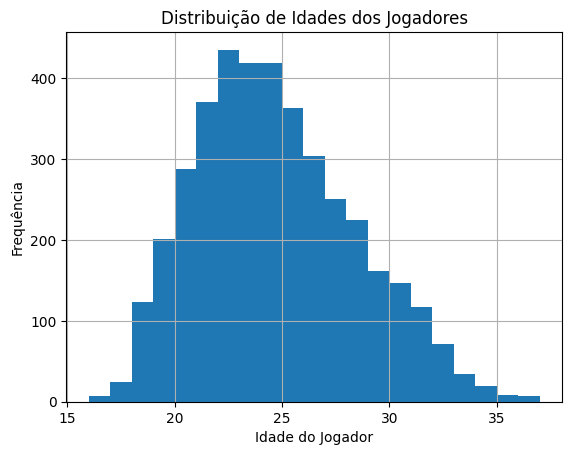

In [46]:
recent_transfers['playerAge'].hist(bins=21)
plt.xlabel('Idade do Jogador')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades dos Jogadores')
plt.show()

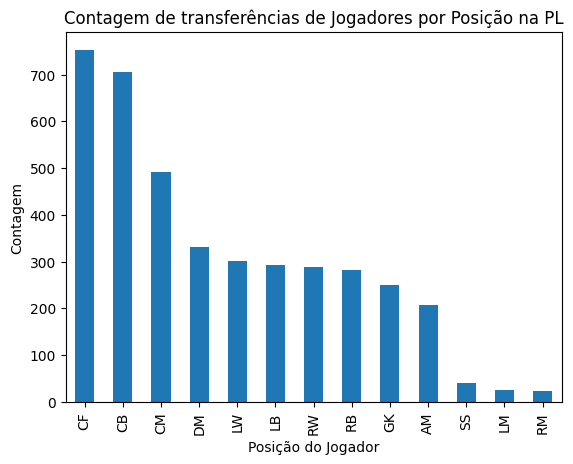

In [47]:
position_counts = recent_transfers['playerPos'].value_counts()

position_counts.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Contagem')
plt.title('Contagem de transferências de Jogadores por Posição na europa')
plt.show()

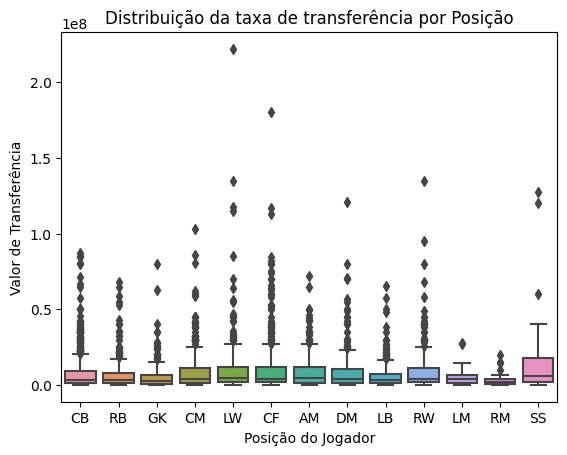

In [48]:
sns.boxplot(data=recent_transfers, x='playerPos', y='transferFee')
plt.xlabel('Posição do Jogador')
plt.ylabel('Valor de Transferência')
plt.title('Distribuição da taxa de transferência por Posição')
plt.show()

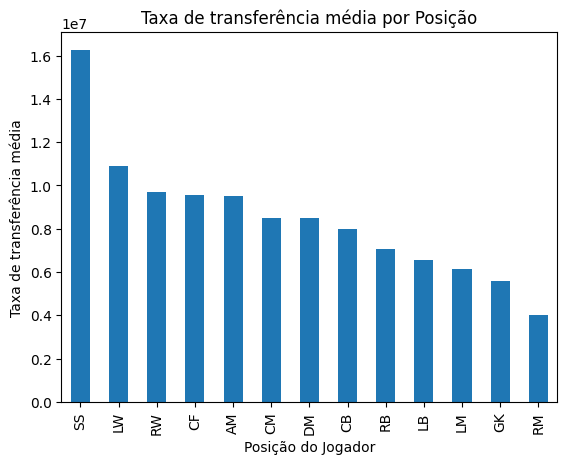

In [49]:
average_market_value_by_position = recent_transfers.groupby('playerPos')['transferFee'].mean()
average_market_value_by_position = average_market_value_by_position.sort_values(ascending=False)

average_market_value_by_position.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Taxa de transferência média')
plt.title('Taxa de transferência média por Posição')
plt.show()

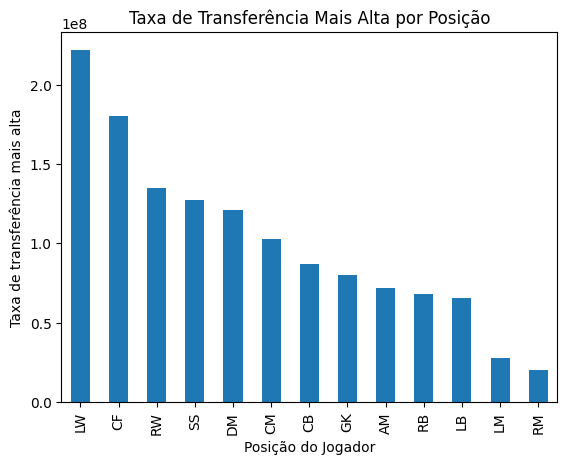

In [50]:
import matplotlib.pyplot as plt

highest_market_value_by_position = recent_transfers.groupby('playerPos')[
    'transferFee'].max()
highest_market_value_by_position = highest_market_value_by_position.sort_values(
    ascending=False)

highest_market_value_by_position.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Taxa de transferência mais alta')
plt.title('Taxa de Transferência Mais Alta por Posição')
plt.show()

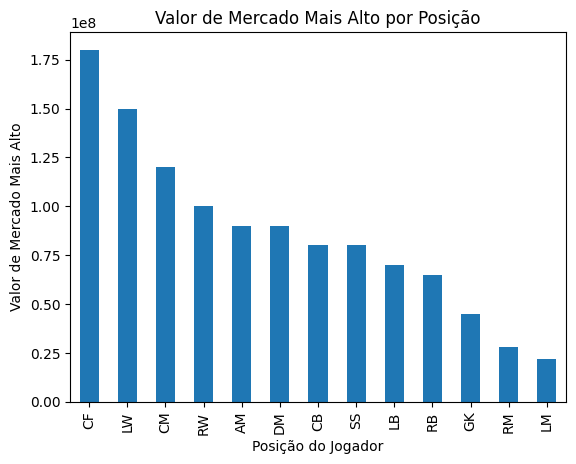

In [51]:
import matplotlib.pyplot as plt

highest_market_value_by_position = recent_transfers.groupby('playerPos')[
    'playerMarketValue'].max()
highest_market_value_by_position = highest_market_value_by_position.sort_values(
    ascending=False)

highest_market_value_by_position.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Valor de Mercado Mais Alto')
plt.title('Valor de Mercado Mais Alto por Posição')
plt.show()

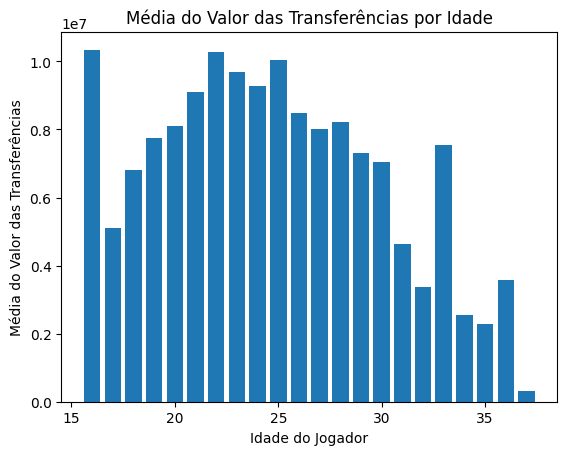

In [52]:
mean_transfer_fee_by_age = recent_transfers.groupby('playerAge')['transferFee'].mean()

plt.bar(mean_transfer_fee_by_age.index, mean_transfer_fee_by_age.values)
plt.xlabel('Idade do Jogador')
plt.ylabel('Média do Valor das Transferências')
plt.title('Média do Valor das Transferências por Idade')
plt.show()

In [53]:
recent_transfers_no_cris = recent_transfers[~((recent_transfers['playerName'] == 'Cristiano Ronaldo') & (recent_transfers['playerAge'] > 30))]

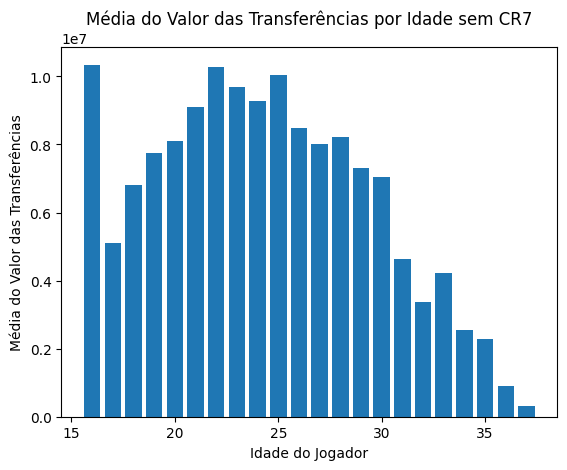

In [54]:
mean_transfer_fee_by_age = recent_transfers_no_cris.groupby('playerAge')['transferFee'].mean()

plt.bar(mean_transfer_fee_by_age.index, mean_transfer_fee_by_age.values)
plt.xlabel('Idade do Jogador')
plt.ylabel('Média do Valor das Transferências')
plt.title('Média do Valor das Transferências por Idade sem CR7')
plt.show()

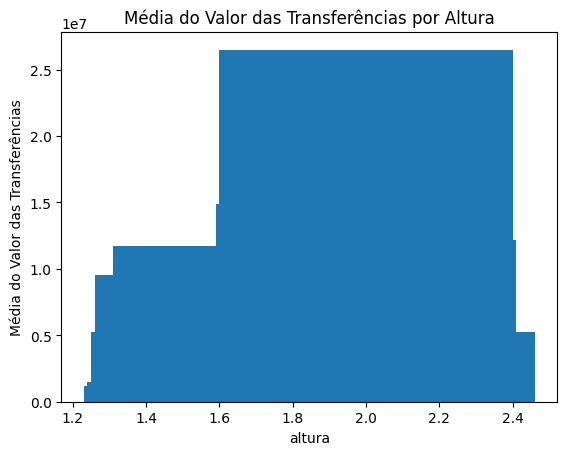

In [55]:
mean_transfer_fee_by_height = recent_transfers_players.groupby('height')['transferFee'].mean()

plt.bar(mean_transfer_fee_by_height.index, mean_transfer_fee_by_height.values)
plt.xlabel('altura')
plt.ylabel('Média do Valor das Transferências')
plt.title('Média do Valor das Transferências por Altura')
plt.show()

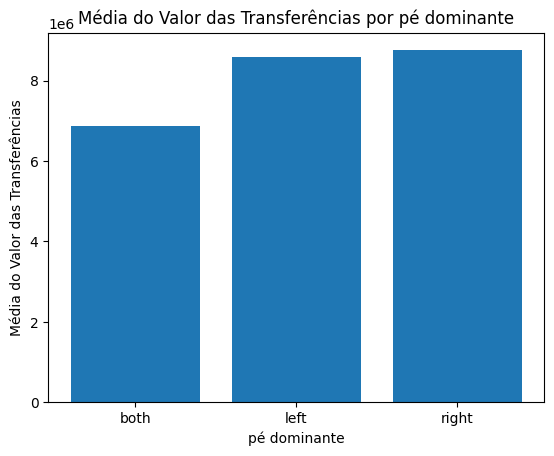

In [56]:
mean_transfer_fee_by_height = recent_transfers_players.groupby('foot')['transferFee'].mean()

plt.bar(mean_transfer_fee_by_height.index, mean_transfer_fee_by_height.values)
plt.xlabel('pé dominante')
plt.ylabel('Média do Valor das Transferências')
plt.title('Média do Valor das Transferências por pé dominante')
plt.show()

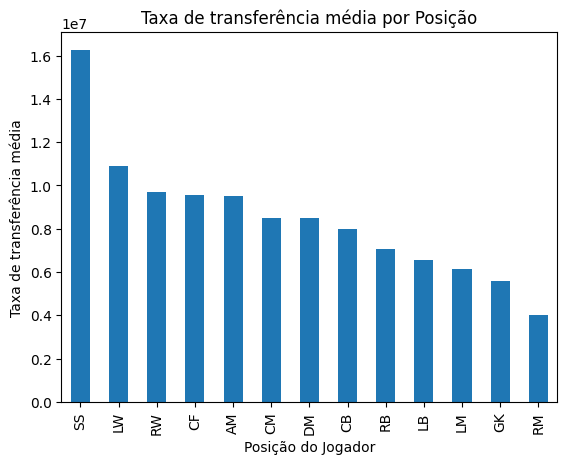

In [57]:
average_market_value_by_position = recent_transfers.groupby('playerPos')['transferFee'].mean()
average_market_value_by_position = average_market_value_by_position.sort_values(ascending=False)

average_market_value_by_position.plot(kind='bar')
plt.xlabel('Posição do Jogador')
plt.ylabel('Taxa de transferência média')
plt.title('Taxa de transferência média por Posição')
plt.show()

Valor de mercado versus taxa de transferência: Você pode explorar a relação entre o valor de mercado atual do jogador e a taxa de transferência usando um gráfico de dispersão. Isso pode ajudar a identificar jogadores que foram transferidos por valores altos ou baixos em relação ao seu valor de mercado.

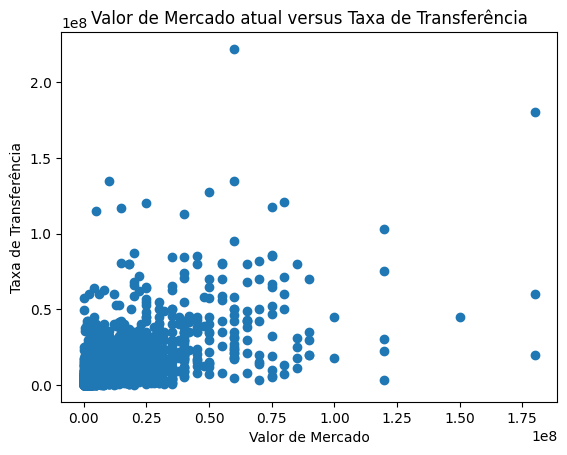

In [58]:
plt.scatter(recent_transfers['playerMarketValue'], recent_transfers['transferFee'])
plt.xlabel('Valor de Mercado')
plt.ylabel('Taxa de Transferência')
plt.title('Valor de Mercado atual versus Taxa de Transferência')
plt.show()

In [59]:
coef_corr = np.corrcoef(recent_transfers['playerMarketValue'], recent_transfers['transferFee'])[0, 1]

print("Coeficiente de correlação:", coef_corr)

Coeficiente de correlação: 0.607583664353078


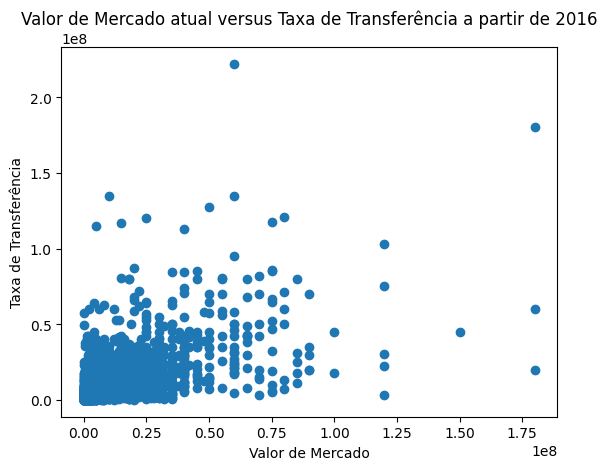

In [60]:
recent_transfers_2016 = recent_transfers[recent_transfers['season'] > 2016]
plt.scatter(recent_transfers_2016['playerMarketValue'], recent_transfers_2016['transferFee'])
plt.xlabel('Valor de Mercado')
plt.ylabel('Taxa de Transferência')
plt.title('Valor de Mercado atual versus Taxa de Transferência a partir de 2016')
plt.show()

In [61]:
coef_corr = np.corrcoef(recent_transfers_2016['playerMarketValue'], recent_transfers_2016['transferFee'])[0, 1]

print("Coeficiente de correlação:", coef_corr)

Coeficiente de correlação: 0.607583664353078


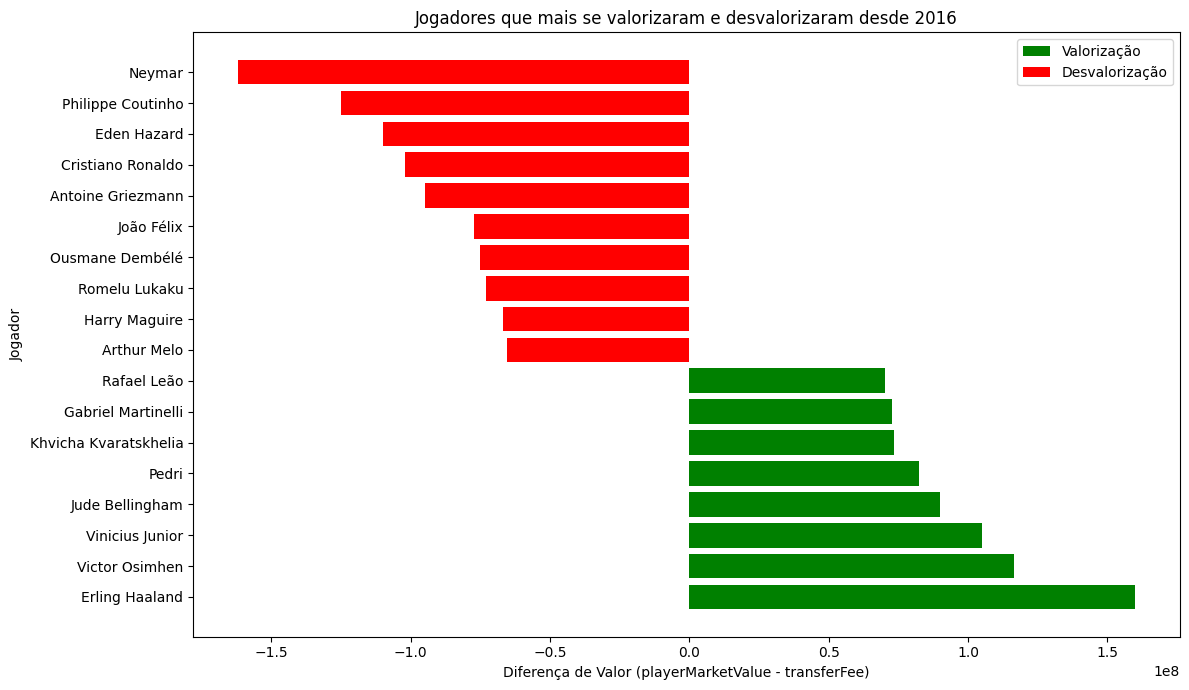

In [62]:
valuation_sorted = recent_transfers_2016.sort_values('valuation', ascending=False)

# Seleciona os 10 jogadores que mais se valorizaram
top_valorizacao = valuation_sorted.head(10)

# Seleciona os 10 jogadores que mais se desvalorizaram
top_desvalorizacao = valuation_sorted.tail(10)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Plotagem dos jogadores que mais se valorizaram
ax.barh(top_valorizacao['playerName'], top_valorizacao['valuation'], color='green', label='Valorização')

# Plotagem dos jogadores que mais se desvalorizaram
ax.barh(top_desvalorizacao['playerName'], top_desvalorizacao['valuation'], color='red', label='Desvalorização')

# Configurações adicionais do gráfico
ax.set_xlabel('Diferença de Valor (playerMarketValue - transferFee)')
ax.set_ylabel('Jogador')
ax.set_title('Jogadores que mais se valorizaram e desvalorizaram desde 2016')
ax.legend()

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

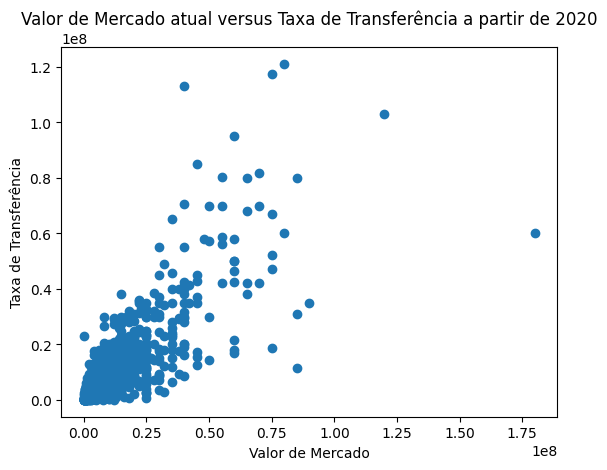

In [63]:
recent_transfers_2020 = recent_transfers[recent_transfers['season'] > 2020]
plt.scatter(recent_transfers_2020['playerMarketValue'], recent_transfers_2020['transferFee'])
plt.xlabel('Valor de Mercado')
plt.ylabel('Taxa de Transferência')
plt.title('Valor de Mercado atual versus Taxa de Transferência a partir de 2020')
plt.show()

In [64]:
coef_corr = np.corrcoef(recent_transfers_2020['playerMarketValue'], recent_transfers_2020['transferFee'])[0, 1]

print("Coeficiente de correlação:", coef_corr)

Coeficiente de correlação: 0.8068035037652325


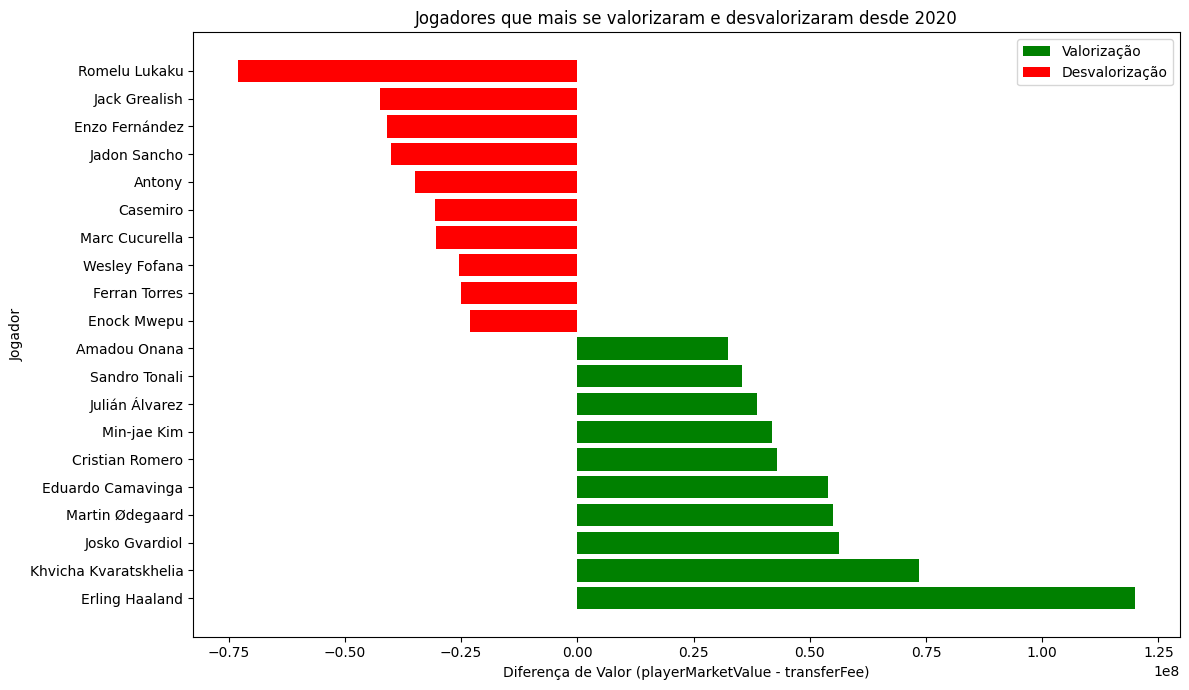

In [65]:
valuation_sorted = recent_transfers_2020.sort_values('valuation', ascending=False)

# Seleciona os 10 jogadores que mais se valorizaram
top_valorizacao = valuation_sorted.head(10)

# Seleciona os 10 jogadores que mais se desvalorizaram
top_desvalorizacao = valuation_sorted.tail(10)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Plotagem dos jogadores que mais se valorizaram
ax.barh(top_valorizacao['playerName'], top_valorizacao['valuation'], color='green', label='Valorização')

# Plotagem dos jogadores que mais se desvalorizaram
ax.barh(top_desvalorizacao['playerName'], top_desvalorizacao['valuation'], color='red', label='Desvalorização')

# Configurações adicionais do gráfico
ax.set_xlabel('Diferença de Valor (playerMarketValue - transferFee)')
ax.set_ylabel('Jogador')
ax.set_title('Jogadores que mais se valorizaram e desvalorizaram desde 2020')
ax.legend()

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


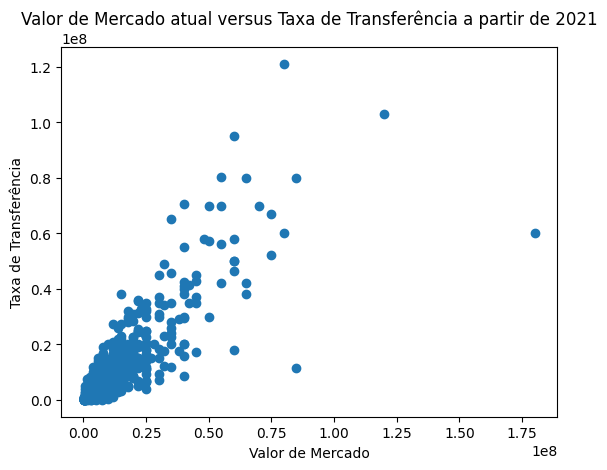

In [66]:
recent_transfers_2021 = recent_transfers[recent_transfers['season'] > 2021]
plt.scatter(recent_transfers_2021['playerMarketValue'], recent_transfers_2021['transferFee'])
plt.xlabel('Valor de Mercado')
plt.ylabel('Taxa de Transferência')
plt.title('Valor de Mercado atual versus Taxa de Transferência a partir de 2021')
plt.show()

In [67]:
coef_corr = np.corrcoef(recent_transfers_2021['playerMarketValue'], recent_transfers_2021['transferFee'])[0, 1]

print("Coeficiente de correlação:", coef_corr)

Coeficiente de correlação: 0.8469662572347038


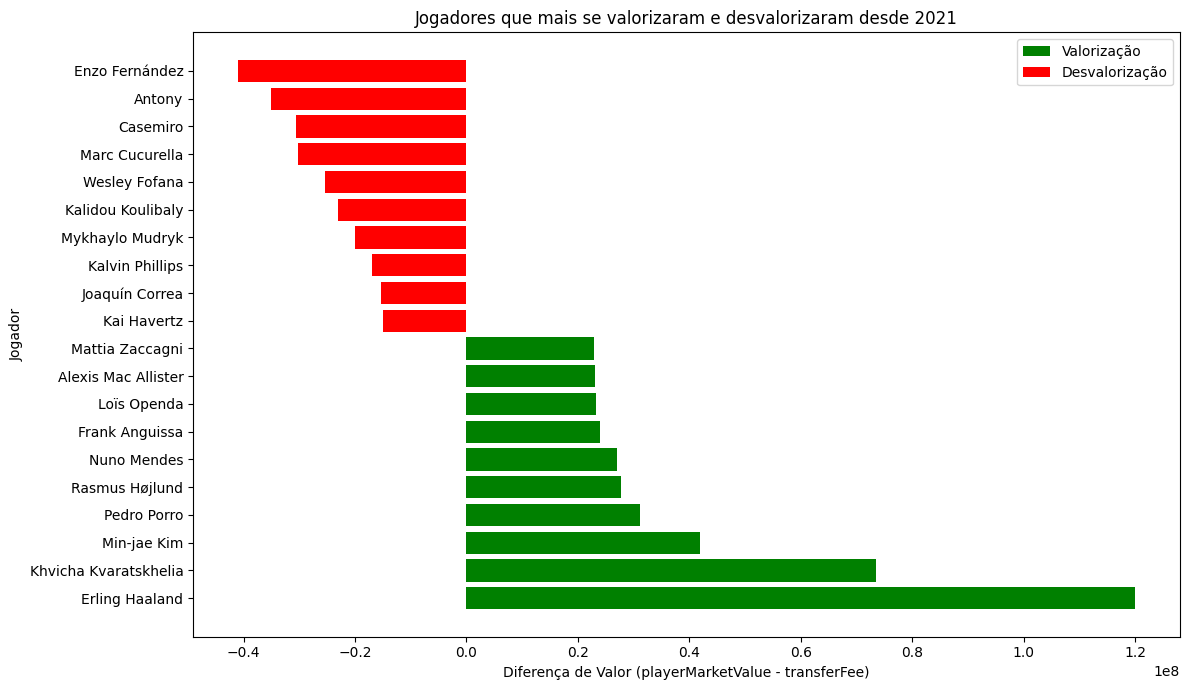

In [68]:
valuation_sorted = recent_transfers_2021.sort_values('valuation', ascending=False)

# Seleciona os 10 jogadores que mais se valorizaram
top_valorizacao = valuation_sorted.head(10)

# Seleciona os 10 jogadores que mais se desvalorizaram
top_desvalorizacao = valuation_sorted.tail(10)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Plotagem dos jogadores que mais se valorizaram
ax.barh(top_valorizacao['playerName'], top_valorizacao['valuation'], color='green', label='Valorização')

# Plotagem dos jogadores que mais se desvalorizaram
ax.barh(top_desvalorizacao['playerName'], top_desvalorizacao['valuation'], color='red', label='Desvalorização')

# Configurações adicionais do gráfico
ax.set_xlabel('Diferença de Valor (playerMarketValue - transferFee)')
ax.set_ylabel('Jogador')
ax.set_title('Jogadores que mais se valorizaram e desvalorizaram desde 2021')
ax.legend()

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


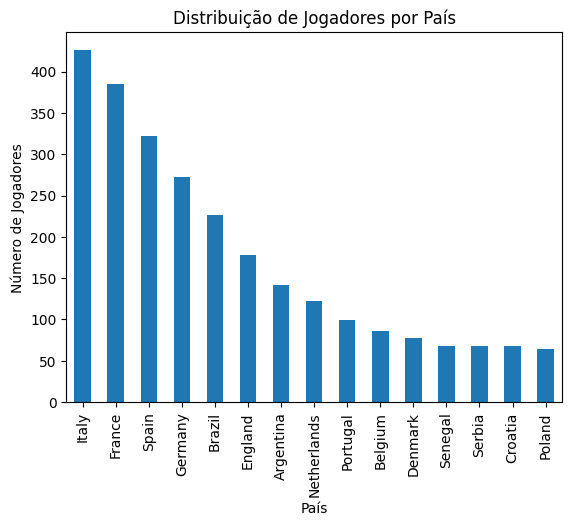

In [69]:
country_counts = recent_transfers['playerCountry'].value_counts().head(15)
country_counts.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Número de Jogadores')
plt.title('Distribuição de Jogadores por País')
plt.show()

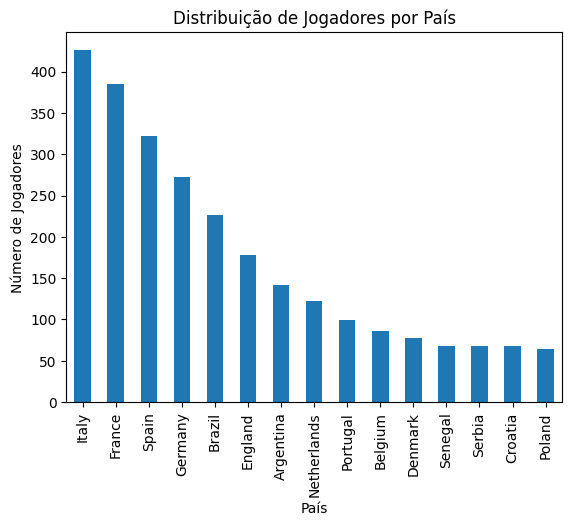

In [70]:
country_counts = recent_transfers['playerCountry'].value_counts().head(15)
country_counts.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Número de Jogadores')
plt.title('Distribuição de Jogadores por País')
plt.show()

Top 15 sem inglaterra

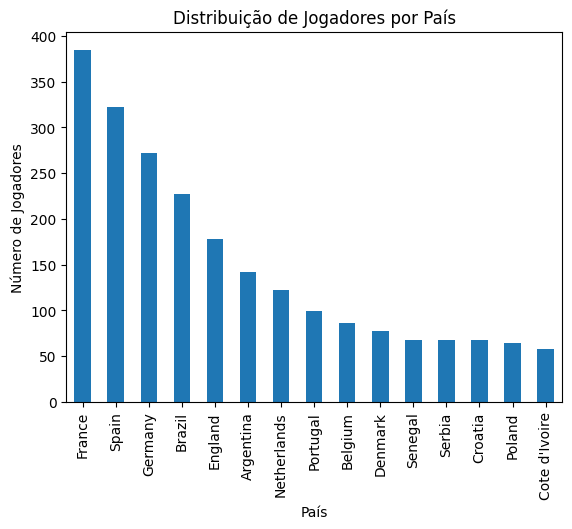

In [71]:
country_counts = recent_transfers['playerCountry'].value_counts().head(16).tail(15)
country_counts.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Número de Jogadores')
plt.title('Distribuição de Jogadores por País')
plt.show()

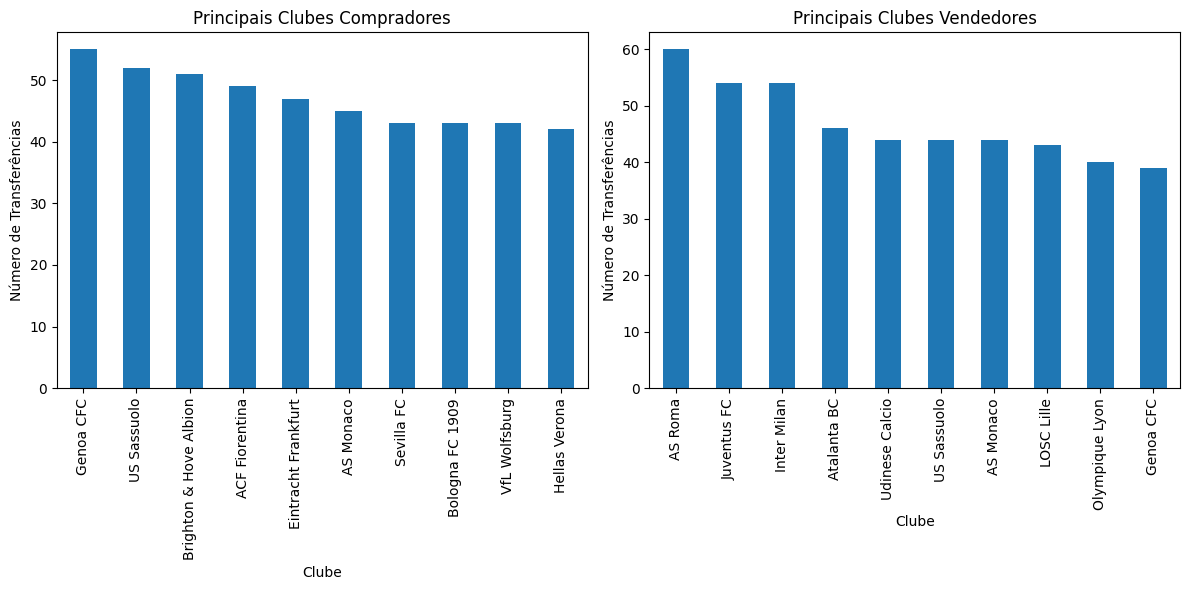

In [72]:
top_buyers = recent_transfers['clubJoined'].value_counts().nlargest(10)
top_sellers = recent_transfers['clubLeft'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
plt.subplot(121)
top_buyers.plot(kind='bar')
plt.xlabel('Clube')
plt.ylabel('Número de Transferências')
plt.title('Principais Clubes Compradores')

plt.subplot(122)
top_sellers.plot(kind='bar')
plt.xlabel('Clube')
plt.ylabel('Número de Transferências')
plt.title('Principais Clubes Vendedores')

plt.tight_layout()
plt.show()

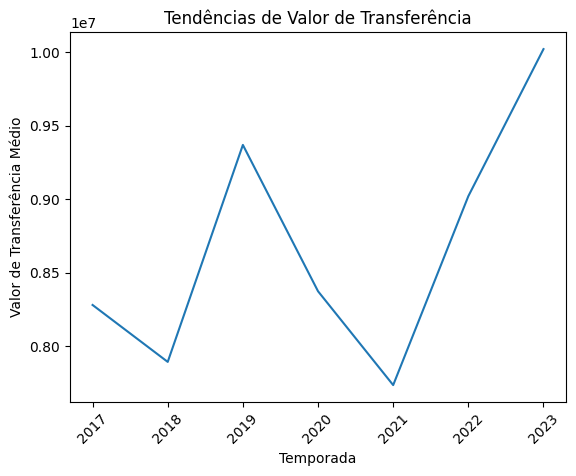

In [73]:
transfer_value_trends = recent_transfers.groupby('season')['transferFee'].mean()

plt.plot(transfer_value_trends.index, transfer_value_trends.values)
plt.xlabel('Temporada')
plt.ylabel('Valor de Transferência Médio')
plt.title('Tendências de Valor de Transferência')
plt.xticks(rotation=45)
plt.show()

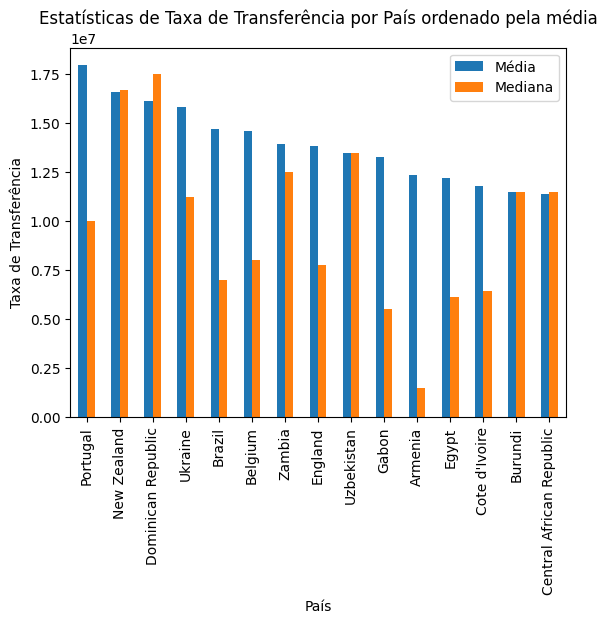

In [74]:
country_stats = recent_transfers.groupby('playerCountry')['transferFee'].agg(['mean', 'median'])
top_countries = country_stats.nlargest(15, 'mean')

top_countries.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Taxa de Transferência')
plt.title('Estatísticas de Taxa de Transferência por País ordenado pela média')
plt.legend(['Média', 'Mediana'])
plt.show()

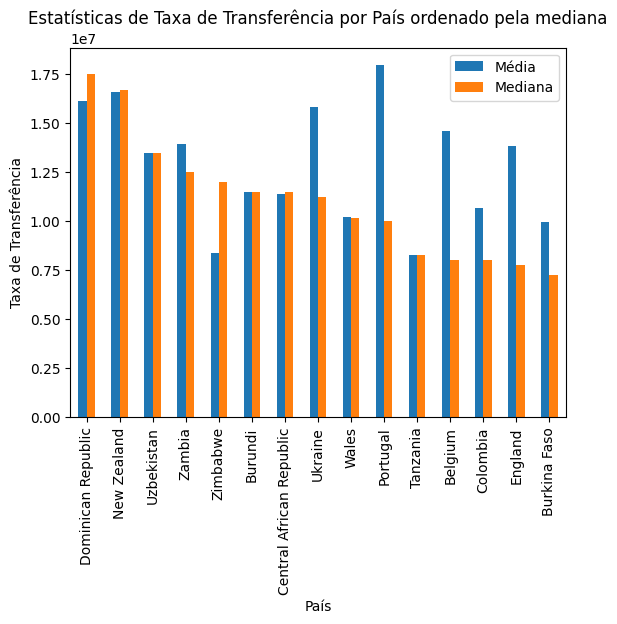

In [75]:
country_stats = recent_transfers.groupby('playerCountry')['transferFee'].agg(['mean', 'median'])
top_countries = country_stats.nlargest(15, 'median')

top_countries.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Taxa de Transferência')
plt.title('Estatísticas de Taxa de Transferência por País ordenado pela mediana')
plt.legend(['Média', 'Mediana'])
plt.show()

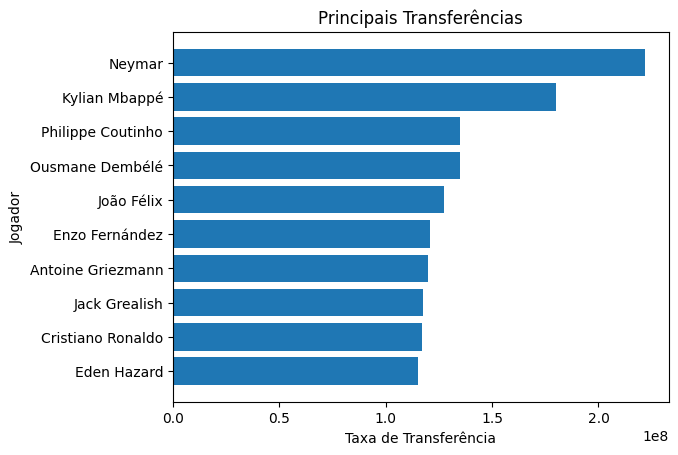

In [76]:
top_transfers = recent_transfers.nlargest(10, 'transferFee')

plt.barh(top_transfers['playerName'], top_transfers['transferFee'])
plt.xlabel('Taxa de Transferência')
plt.ylabel('Jogador')
plt.title('Principais Transferências')
plt.gca().invert_yaxis()
plt.show()

/tmp/ipykernel_1174121/1593735737.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


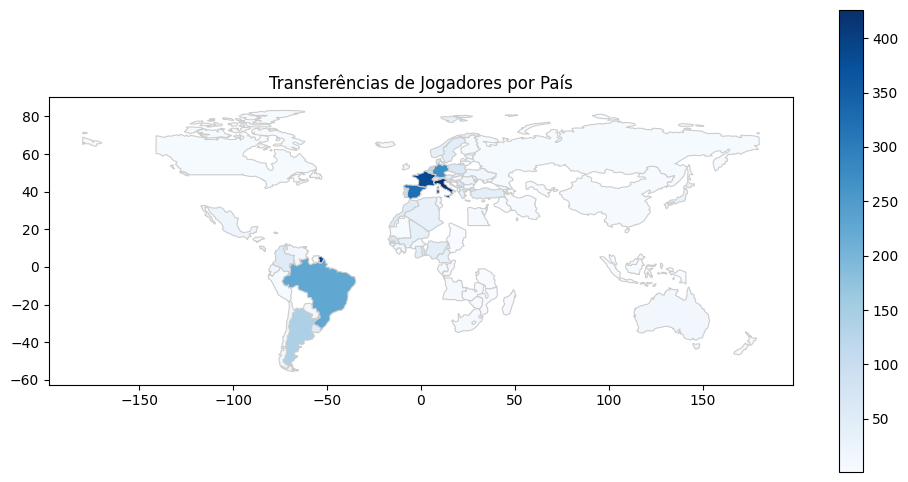

In [77]:
import geopandas as gpd

# Carregar arquivo shapefile com os dados geográficos dos países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calcular o número de transferências por país
transfer_counts = recent_transfers['playerCountry'].value_counts()
transfer_counts = transfer_counts.reset_index()
transfer_counts.columns = ['country', 'transfer_count']

# Mesclar dados geográficos com dados de transferências
merged_data = world.merge(transfer_counts, left_on='name', right_on='country', how='left')

# Plotar o mapa de transferências
fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(column='transfer_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Transferências de Jogadores por País')
plt.show()

# Pré-processamento dos dados
Nesta seção realizaremos o tratamento dos dados, removendo outliers, normalizando, padronizando e transformando os dados